# Spring 2022 Statistical NLP, UCSD
Programming Assignment 5: Machine Translation<br>


In [15]:
import timeit
import numpy as np

import matplotlib.pyplot as plt
plt.switch_backend('agg')
import matplotlib.ticker as ticker
%matplotlib inline

# 1. Take a look at the data

In [16]:
english_corpus = "corpus.en"
spanish_corpus = "corpus.es"

en_lines = []
with open(english_corpus) as f:
    en_lines = f.readlines()
    
es_lines = []
with open(spanish_corpus) as f:
    es_lines = f.readlines()

In [17]:
print("Same number of sentences in es, and en?: ", len(en_lines)==len(en_lines), len(es_lines), len(en_lines))

Same number of sentences in es, and en?:  True 5401 5401


### 1.1 Look at the lengths of sentences that are translations of each other

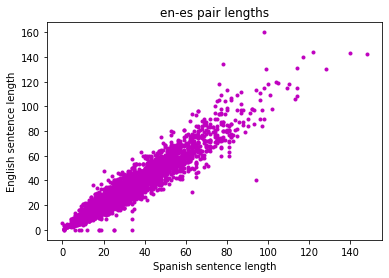

In [18]:
en_lengths = []
es_lengths = []
for i in range(len(en_lines)):
    en_lengths.append(len(en_lines[i].split()))
    es_lengths.append(len(es_lines[i].split()))
    
plt.plot(en_lengths, es_lengths, 'm.')

plt.ylabel('English sentence length')
plt.xlabel('Spanish sentence length')
plt.title('en-es pair lengths')
plt.show()

#### 1.1a Compute pearson correlation between the lenghts of translation pairs

In [19]:
from scipy.stats.stats import pearsonr
correlation = pearsonr(en_lengths, es_lengths)
print('Pearson correlation (en-es pair lengths): ', correlation[0])

Pearson correlation (en-es pair lengths):  0.9547775748355627


# 2. Some spanish words can be generated from NULL, add in NULL on the english side


In [20]:
def read_corpus_addnull(english_corpus, foreign_corpus):
    "Reads a corpus and adds in the NULL word."
    english = [["*"] + e_sent.split() for e_sent in open(english_corpus)]
    foreign = [f_sent.split() for f_sent in open(foreign_corpus)]
    return english, foreign

english, spanish = read_corpus_addnull(english_corpus, spanish_corpus)

# check that english sentence has indeed been append with * symbol
print(english[100])
print(spanish[100])

['*', 'that', 'is', 'why', 'my', 'group', 'moves', 'that', 'this', 'item', 'be', 'taken', 'off', 'the', 'agenda', '.']
['por', 'consiguiente', ',', 'mi', 'grupo', 'solicita', 'que', 'se', 'suprima', 'este', 'punto', 'del', 'dÃ\xada', '.']


# 3.  What are the foreign words that could be aligned to e, i.e., let's compute n(e)

In [21]:
parallel_corpus = zip(english, spanish)
for e, s in parallel_corpus:
    print("En |", " ".join(e))
    print("Es |", " ".join(s))
    for e_j in e:
        for s_i in s:
            pair = (e_j, s_i)
            print(pair)
            #inc(initial_counts.word, e_j, 1.0)
        
    break

En | * resumption of the session
Es | reanudaciÃ³n del perÃ­odo de sesiones
('*', 'reanudaciÃ³n')
('*', 'del')
('*', 'perÃ\xadodo')
('*', 'de')
('*', 'sesiones')
('resumption', 'reanudaciÃ³n')
('resumption', 'del')
('resumption', 'perÃ\xadodo')
('resumption', 'de')
('resumption', 'sesiones')
('of', 'reanudaciÃ³n')
('of', 'del')
('of', 'perÃ\xadodo')
('of', 'de')
('of', 'sesiones')
('the', 'reanudaciÃ³n')
('the', 'del')
('the', 'perÃ\xadodo')
('the', 'de')
('the', 'sesiones')
('session', 'reanudaciÃ³n')
('session', 'del')
('session', 'perÃ\xadodo')
('session', 'de')
('session', 'sesiones')


# 4. Understanding n(e)

In [22]:
#n(e) is the number of different words that occur in any translation of a sentence
#containing e. 

n_e = {}
parallel_corpus = zip(english, spanish)
wordpairs = set()
for e, s in parallel_corpus:
    for e_j in e:
        for s_i in s:
            wordpair = (e_j, s_i)
            if wordpair not in wordpairs:
                wordpairs.add(wordpair)
                if not e_j in n_e:
                    n_e[e_j] = 0
                n_e[e_j]+=1

n_e

{'*': 12001,
 'resumption': 71,
 'of': 9697,
 'the': 11162,
 'session': 191,
 'i': 5582,
 'declare': 81,
 'resumed': 95,
 'european': 4002,
 'parliament': 2646,
 'adjourned': 32,
 'on': 5815,
 'friday': 51,
 '17': 210,
 'december': 333,
 '1999': 1005,
 ',': 10375,
 'and': 9302,
 'would': 3408,
 'like': 2472,
 'once': 976,
 'again': 1106,
 'to': 9653,
 'wish': 731,
 'you': 2491,
 'a': 7589,
 'happy': 207,
 'new': 1904,
 'year': 1059,
 'in': 8745,
 'hope': 909,
 'that': 7603,
 'enjoyed': 110,
 'pleasant': 29,
 'festive': 44,
 'period': 843,
 '.': 11625,
 'although': 802,
 'as': 4936,
 'will': 4160,
 'have': 4924,
 'seen': 443,
 'dreaded': 32,
 "'millennium": 32,
 'bug': 32,
 "'": 1264,
 'failed': 169,
 'materialise': 46,
 'still': 1364,
 'people': 1685,
 'number': 804,
 'countries': 1640,
 'suffered': 160,
 'series': 323,
 'natural': 384,
 'disasters': 462,
 'truly': 289,
 'were': 1751,
 'dreadful': 91,
 'requested': 236,
 'debate': 1313,
 'this': 6264,
 'subject': 1095,
 'course': 1139,

In [23]:
parallel_corpus

In [24]:
t = {} # uniform distribution
for e, s in parallel_corpus:
    for e_j in e:
        for s_i in s:
            key = (e_j, s_i)
            t[key] = 1/ n_e.get(e_j)
        
    break

t

{}

In [25]:
# Visualization of t
import pandas as pd

prob_table = pd.DataFrame.from_dict(t,  orient='index',columns=['probability'])
prob_table

,probability


In [26]:
def em_algorithmn(english_corpus, foreign_corpus, iteration = 5):

    for iter in range(iteration):
        # Initialize
        count = {}
        total = {}

        n_e = {}
        parallel_corpus = zip(english, spanish)
        wordpairs = set()
        for e, s in parallel_corpus:
            for e_j in e:
                for s_i in s:
                    wordpair = (e_j, s_i)
                    if wordpair not in wordpairs:
                        wordpairs.add(wordpair)
                        if not e_j in n_e:
                            n_e[e_j] = 0
                        n_e[e_j]+=t[(e_j, s_i)]

        return n_e

### 4.1 Sanity check n(e)

In [27]:
# Sanity check n_e for NULL should be equal to the  number of unique spanish words.
# This is because the special English word NULL can be aligned to any foreign word
#in the corpus.

print(n_e["*"])

spanish_words = set()
for sent in spanish:
    for word in sent:
        spanish_words.add(word)
print(len(spanish_words), n_e["*"] ==len(spanish_words))         

12001
12001 True


### 4.2 Words with Large n(e)

In [28]:
import operator

# WORDS WITH LARGE (n(e))
sorted_x = sorted(n_e.items(), key=operator.itemgetter(1), reverse=True)
j = 0
for pair in sorted_x: 
    print(pair)
    j+=1
    
    if j > 15:
        break

('*', 12001)
('.', 11625)
('the', 11162)
(',', 10375)
('of', 9697)
('to', 9653)
('and', 9302)
('in', 8745)
('that', 7603)
('a', 7589)
('is', 7106)
('for', 6337)
('this', 6264)
('we', 5998)
('on', 5815)
('which', 5789)


### 4.3 Words with Small n(e)

In [29]:
# WORDS WITH SMALL (n(e))
sorted_x = sorted(n_e.items(), key=operator.itemgetter(1))
j = 0
for pair in sorted_x: 
    print(pair)
    j+=1
    
    if j > 15:
        break

("'long-winded", 3)
('superb', 5)
('radwan', 5)
('fine-tuned', 5)
("'confusing", 5)
('tarred', 5)
('dirty', 5)
('brush', 5)
('vote-', 6)
('tolerable', 6)
('55', 6)
('shadow-boxing', 6)
('fraga', 6)
('est', 6)
('vez', 6)
('workable', 7)
